In [3]:
import pandas as pd
import pandas as lag_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot

df = pd.read_csv("/content/air.us.txt")
df.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,10.245,10.510,10.198,10.501,88923,0
1,2005-02-28,10.483,10.558,10.106,10.245,156298,0
2,2005-03-01,10.216,10.831,10.216,10.794,122341,0
3,2005-03-02,10.748,10.989,10.568,10.660,282227,0
4,2005-03-03,10.668,10.887,10.585,10.651,154338,0
5,2005-03-04,10.887,11.164,10.704,11.135,158364,0
6,2005-03-07,11.669,11.853,11.254,11.532,642815,0
7,2005-03-08,11.532,11.703,11.467,11.623,315531,0
8,2005-03-09,11.631,11.685,11.532,11.631,176211,0
9,2005-03-10,11.641,11.641,11.207,11.457,219314,0


In [4]:
print(df.head())
print()
print(df.shape)
print()
print(df.columns)

         Date    Open    High     Low   Close  Volume  OpenInt
0  2005-02-25  10.245  10.510  10.198  10.501   88923        0
1  2005-02-28  10.483  10.558  10.106  10.245  156298        0
2  2005-03-01  10.216  10.831  10.216  10.794  122341        0
3  2005-03-02  10.748  10.989  10.568  10.660  282227        0
4  2005-03-03  10.668  10.887  10.585  10.651  154338        0

(3201, 7)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


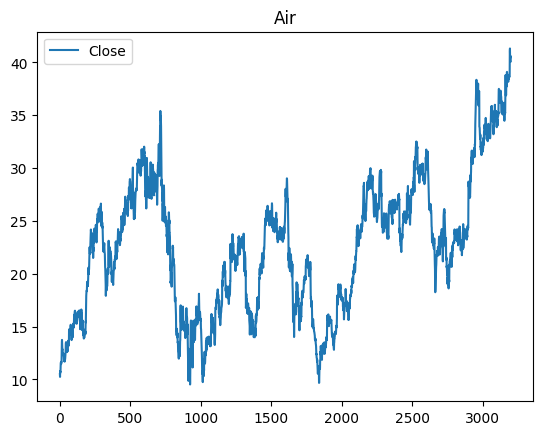

In [5]:
df[['Close']].plot()
plt.title("Air")
plt.show()

Text(0.5, 1.0, 'Air Cumulative Returns')

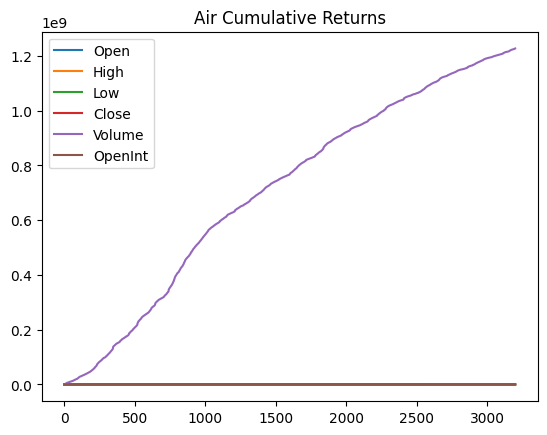

In [6]:
dr = df.cumsum()
dr.plot()
plt.title('Air Cumulative Returns')

Text(0.5, 1.0, 'Air Autocorrelation plot')

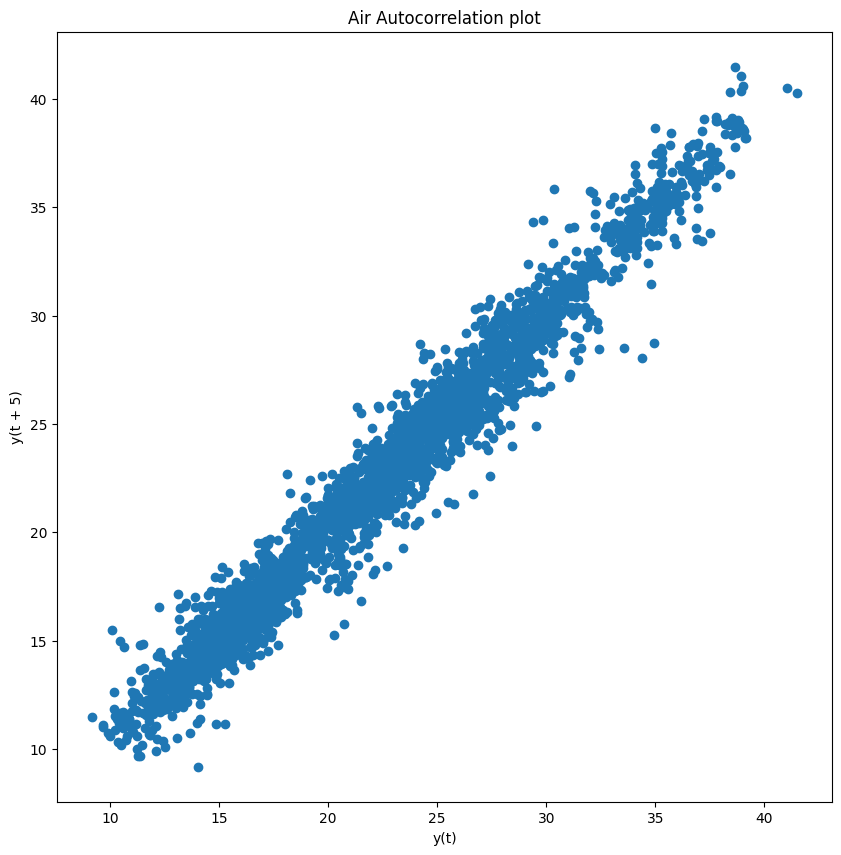

In [7]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Air Autocorrelation plot')

In [8]:
df['Date'][1000]

'2009-02-17'

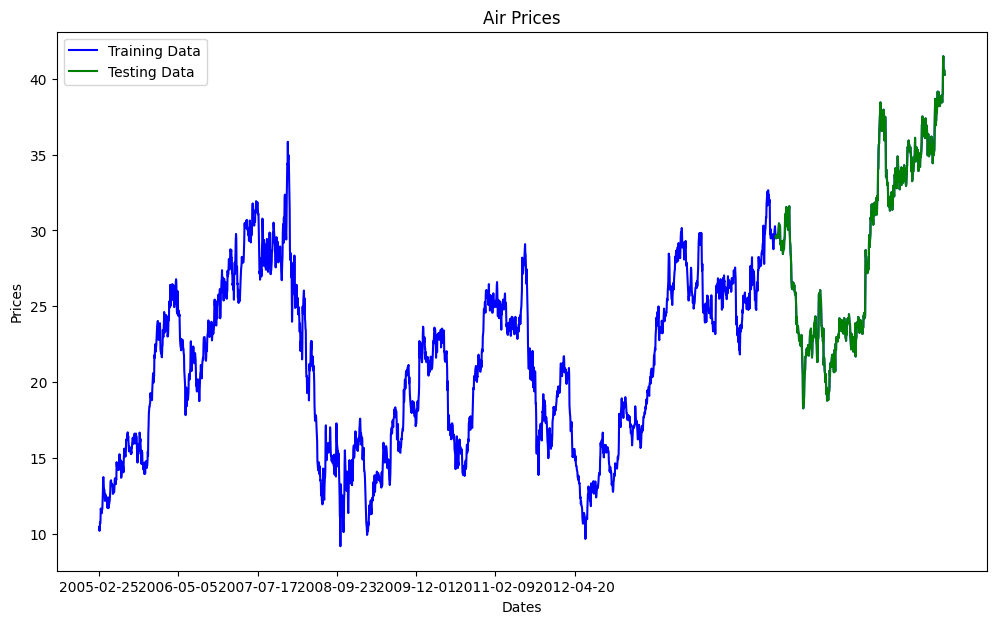

In [9]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Air Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [10]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [12]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 0.276
Symmetric mean absolute percentage error: 1.348


<ipython-input-13-e5c2959c6944>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "green" (-> color=(0.0, 0.5019607843137255, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot(df['Open'], 'green', color='blue', label='Training Data')


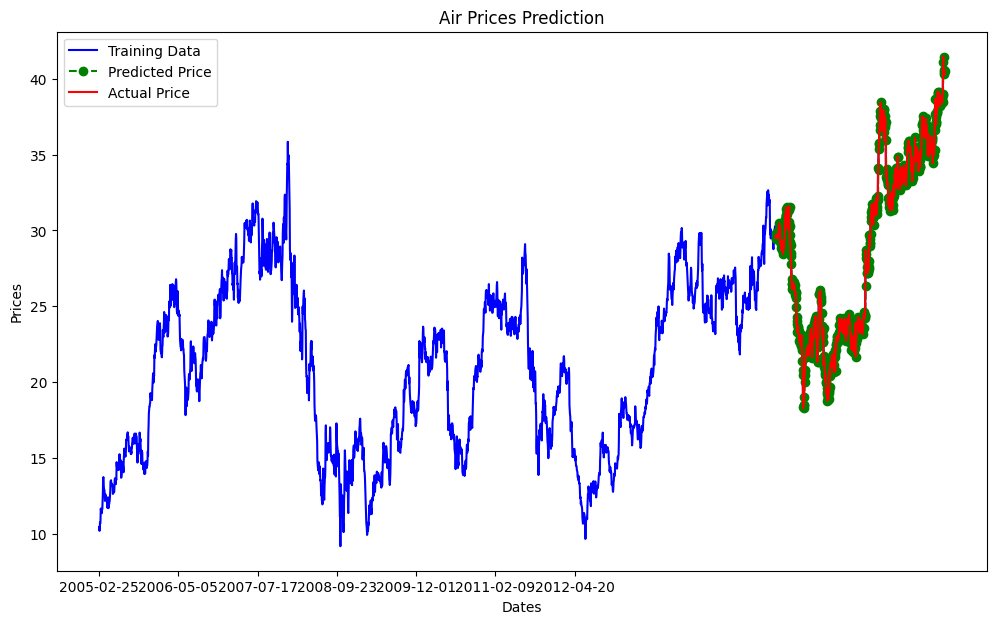

In [13]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Air Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

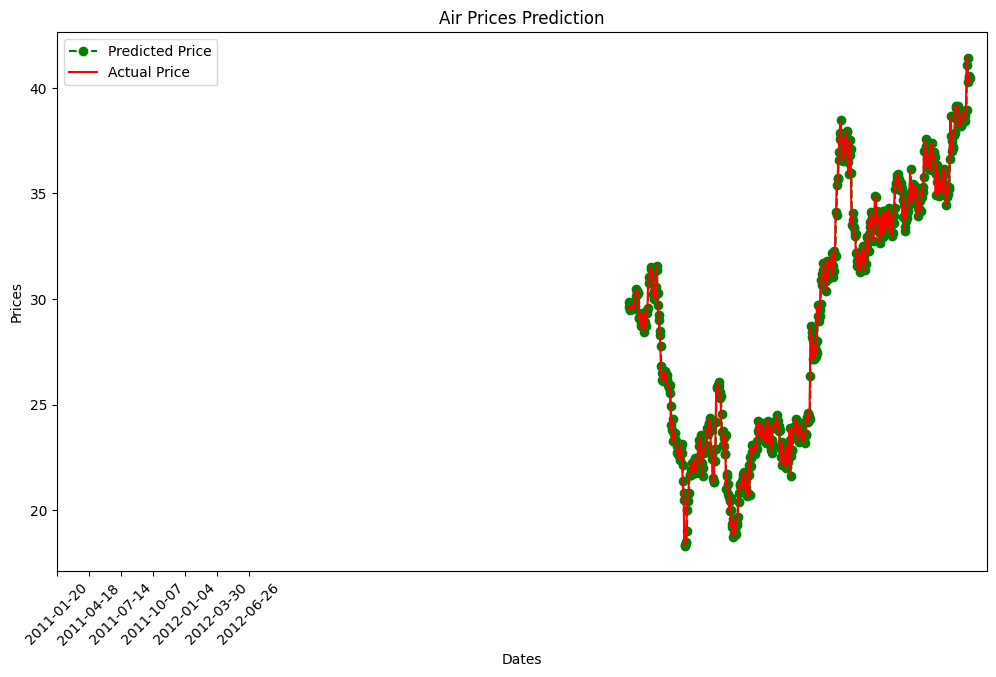

In [14]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486, 1856, 60), df['Date'][1486:1856:60], rotation=45)
plt.title('Air Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()